In [ ]:
#Exercise 1-4
#1.What type of algorithm would you use to segment a company customers database 
#into multiple groups?
    #K-Means clustering

#2.Would you frame the problem of spam detection as a supervised learning
#problem or an unsupervised learning problem? Explain.
    #Unsupervised because when you get an email for example, it won’t say it’s 
    #spam. It will have to go through the machine learning process, and it will 
    #detect if the email is spam or not!
    
#3.What is a test set, and why would you want to use it?
    #A test set is a sample of the data. You use a test set to test your  
    #model after it’s been trained on the rest of your set of data. This can 
    #help you find discrepancies or errors within your model that you should improve 
    #before deploying it. 
    
#4.You are training a classification model with 100 variables/features 
#that achieves 95% accuracy in the training dataset. However, when you run 
#it in the test dataset, you only get 60% accuracy. Which of the following options
#are valid approached to solve this problem?
    #
    
    

In [12]:
import boto3
import pandas as pd; pd.set_option('display.max_column', 100)
import numpy as np

s3= boto3.resource('s3')
bucket_name= 'morgangant-bata-445-bucket'
bucket= s3.Bucket(bucket_name)

file_key= 'Real_Estate.csv'

bucket_object= bucket.Object(file_key)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

#reading the datefile
house_price = pd.read_csv(file_content_stream)
house_price.head()

,No,transaction_date,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
#Drop column
house_price= house_price.drop(columns= ['No', 'transaction_date'], axis=1)
house_price.head()

,house_age,distance_to_the_nearest_MRT_station,number_of_convenience_stores,latitude,longitude,house_price_of_unit_area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [14]:
from sklearn.model_selection import train_test_split

#Define the input and target variable
x= house_price.drop(columns= 'house_price_of_unit_area', axis=1)
y= house_price['house_price_of_unit_area']

#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

In [15]:
from sklearn.linear_model import LinearRegression
#Building Linear Model
lm_md= LinearRegression().fit(x_train, y_train)

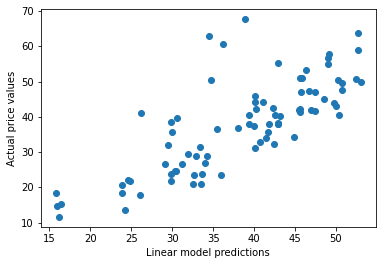

In [16]:
#Make predictions on test
lm_pred= lm_md.predict(x_test)
lm_pred #How good are these predictions?

import matplotlib.pyplot as plt
plt.scatter(lm_pred, y_test)
plt.xlabel('Linear model predictions')
plt.ylabel('Actual price values')
plt.show()

In [17]:
#Computing MSE (Lower the better)
MSE=np.mean((y_test-lm_pred)**2)
MSE

67.76024696308639

In [18]:
x_train2= x_train.drop(columns='distance_to_the_nearest_MRT_station')
lm_md= LinearRegression().fit(x_train2, y_train)

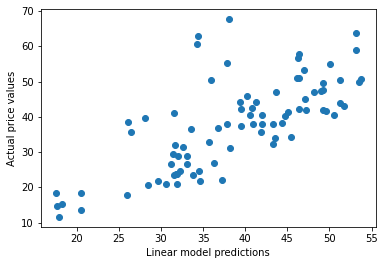

In [24]:
#Make predictions on test
x_test2=x_test.drop(columns='distance_to_the_nearest_MRT_station')
lm_pred2= lm_md.predict(x_test2)
lm_pred2 #How good are these predictions?

import matplotlib.pyplot as plt
plt.scatter(lm_pred2, y_test)
plt.xlabel('Linear model predictions')
plt.ylabel('Actual price values')
plt.show()

In [26]:
#Computing MSE (Lower the better)
MSE2=np.mean((y_test-lm_pred2)**2)
MSE2

78.12102080982531

In [ ]:
#f. Based on parts d and e, I woudl use the first model because I got a model with 
# an MSE about 10 less than the first model! When i ran it M1=67.8 and M2=78.12

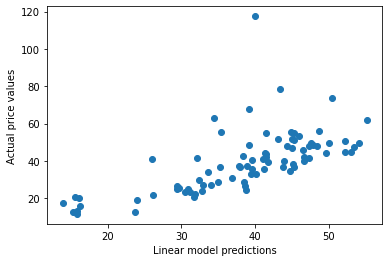

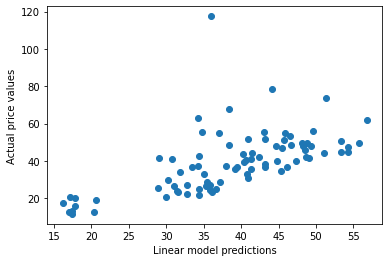

157.21378448895672
172.1209059400968


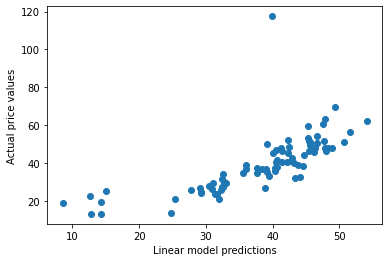

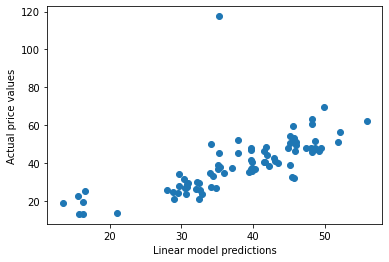

113.01241828008182
124.21241128811363


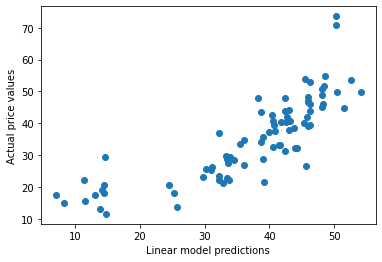

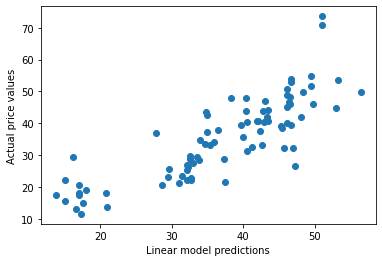

57.16072647130713
53.171692484184035


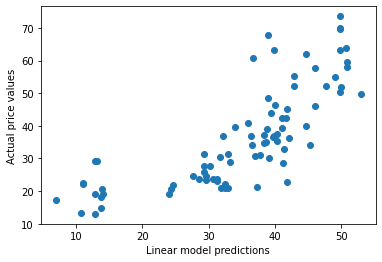

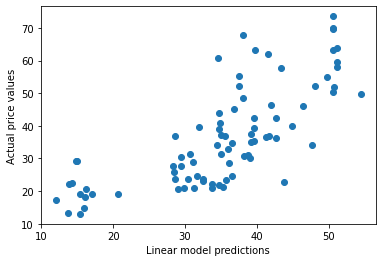

96.32483199561077
105.21027803333773


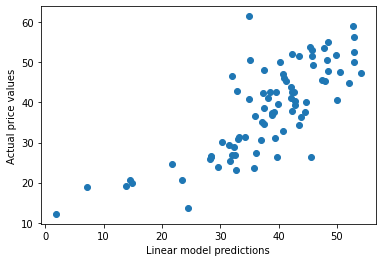

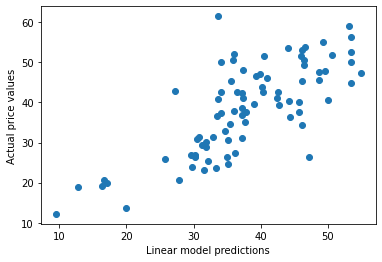

51.516436412695086
55.388640852471895


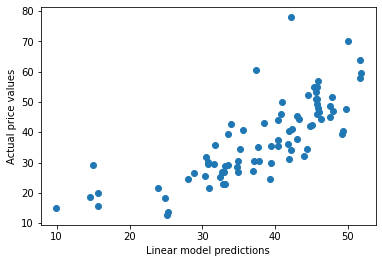

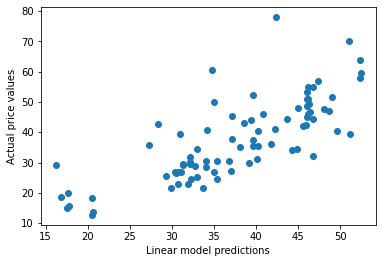

69.48834367061559
72.23376333273522


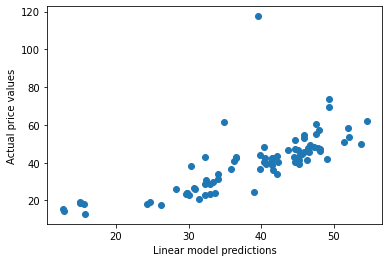

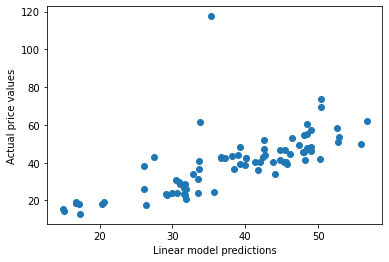

122.16757114217793
131.92200633354173


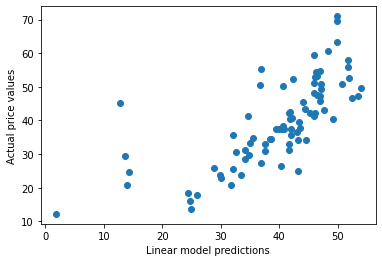

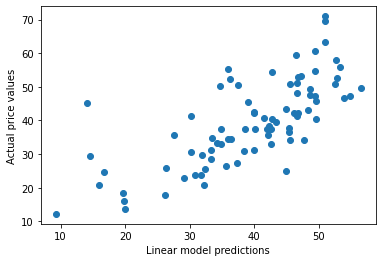

75.51159607253088
76.74209708287636


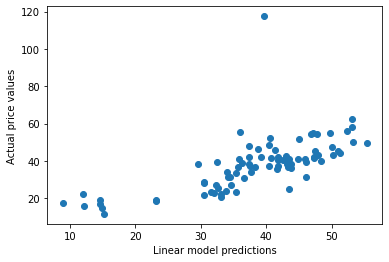

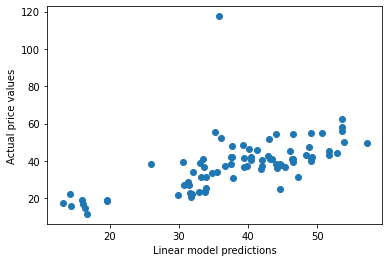

118.57634767223477
131.49974466828937


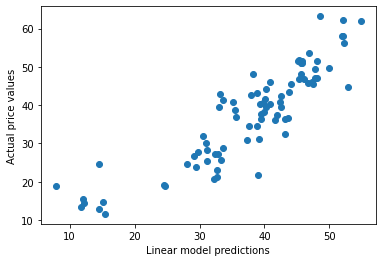

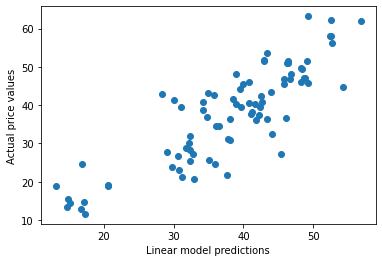

34.053623042185734
42.062093710307586


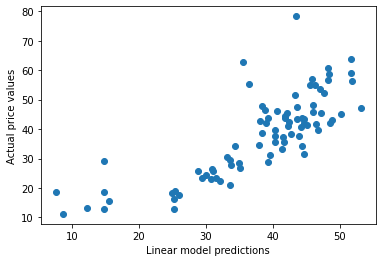

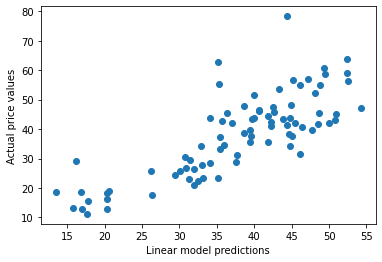

71.33587434914277
71.20991618012508


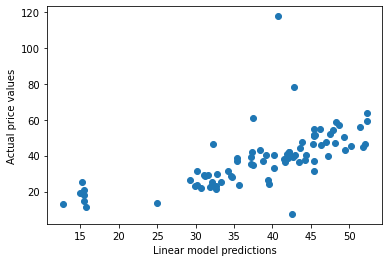

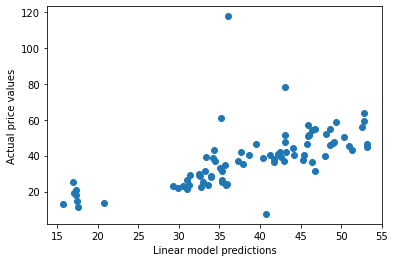

147.73305010920265
153.5036752226643


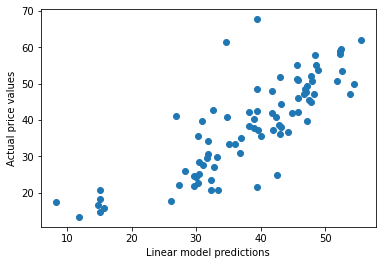

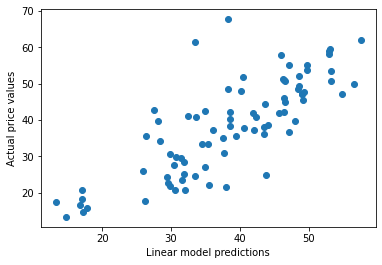

55.444517711875356
62.228380972090015


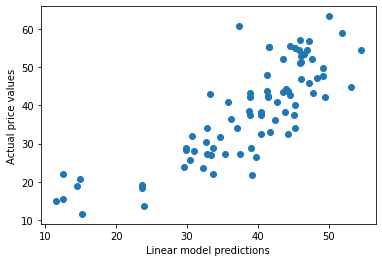

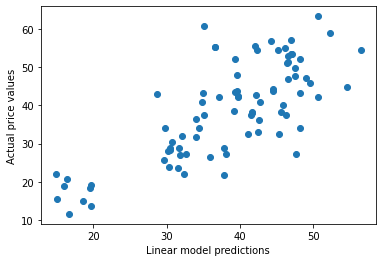

53.18058782537638
66.7682152788279


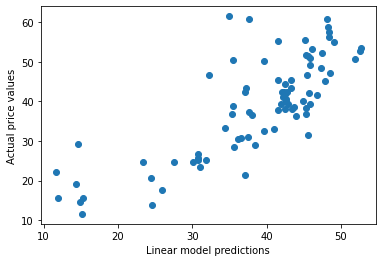

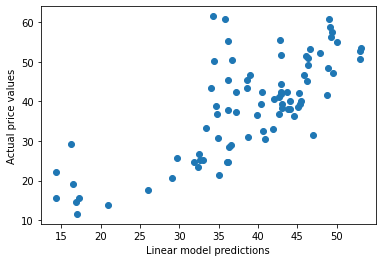

58.05013074692045
67.13325270221692


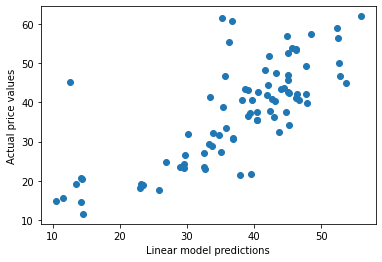

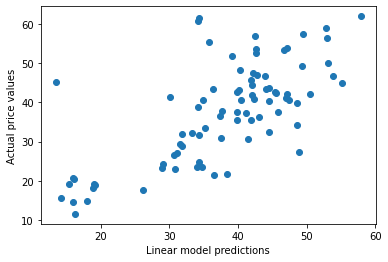

69.67240292103538
82.18532935900038


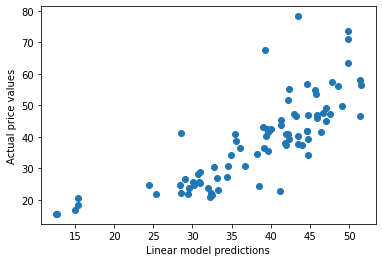

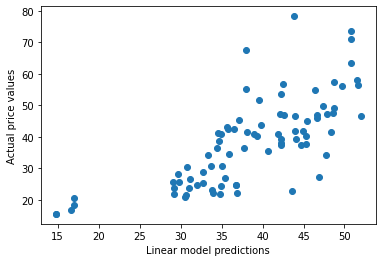

74.77447542887656
91.02078011135832


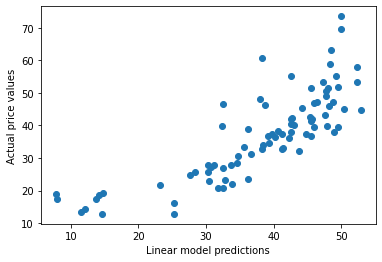

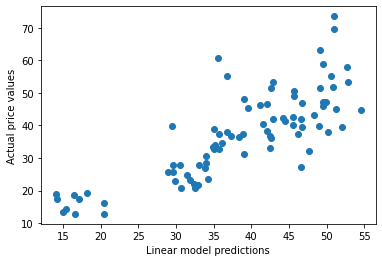

60.832259729320135
64.83831810399636


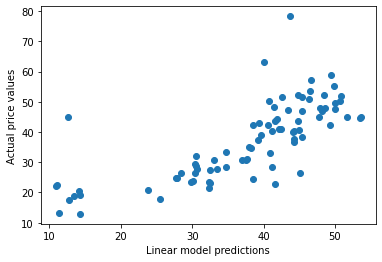

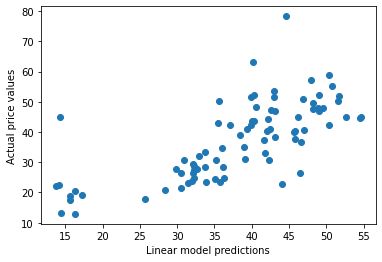

74.57010928313639
82.00335754174375


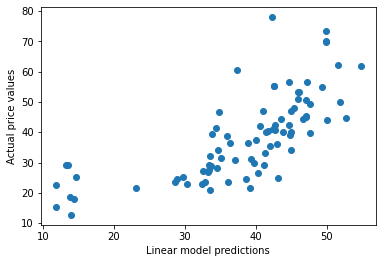

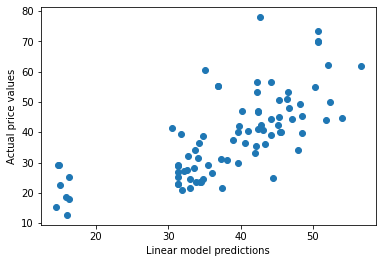

94.55842903385357
98.41475354421247


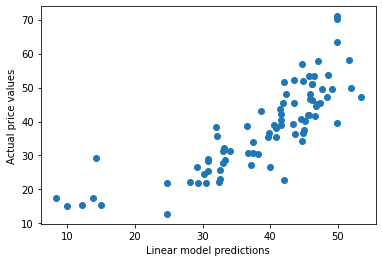

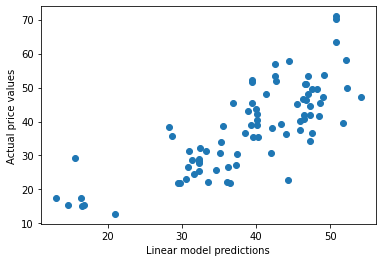

52.474603281459444
64.02408967054069


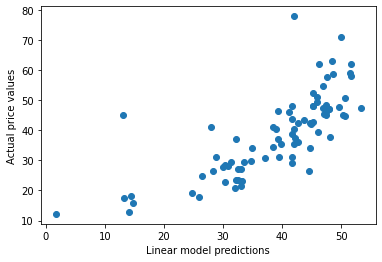

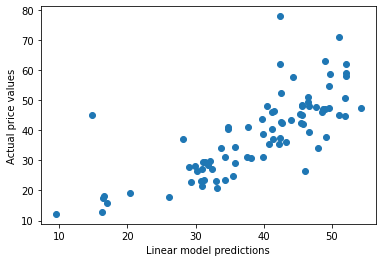

77.71041633119266
76.21731034551689


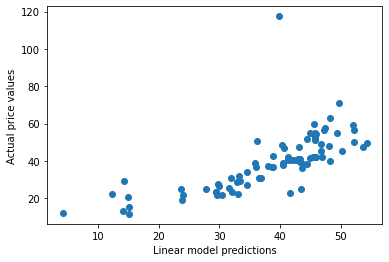

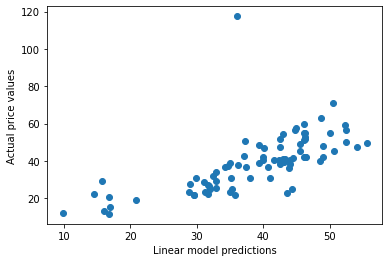

123.49820042852335
137.64301628514016


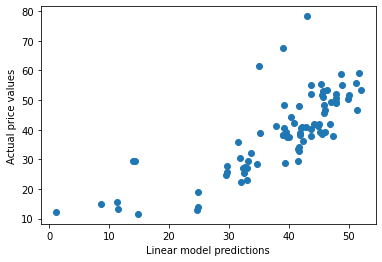

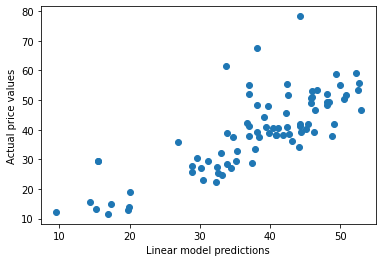

71.78614360412679
71.40499212440353


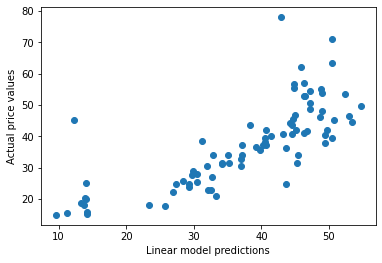

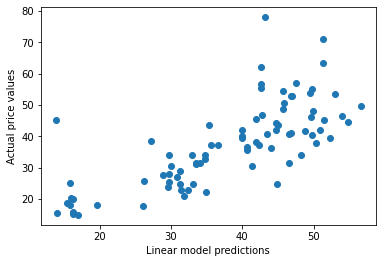

75.11902264449549
82.43619048093208


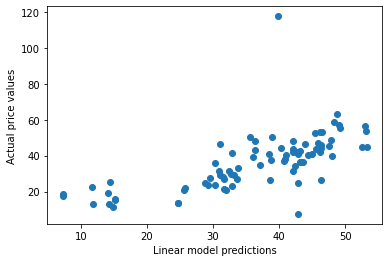

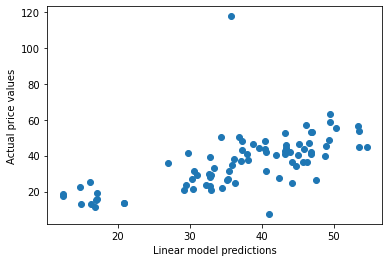

140.01105848250583
152.13843816524644


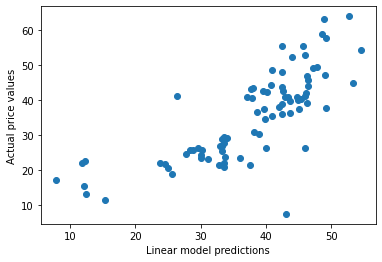

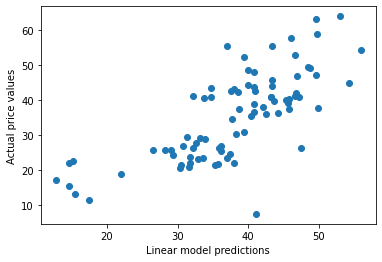

68.10723702935711
76.2841001131392


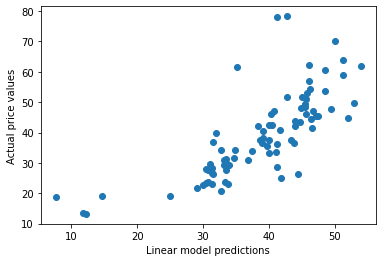

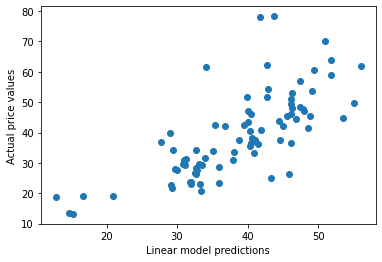

86.81369651226062
91.14521753695541


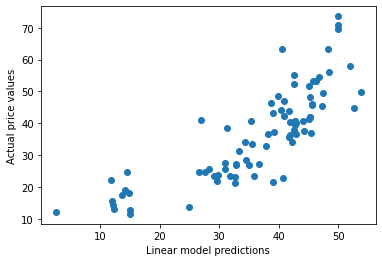

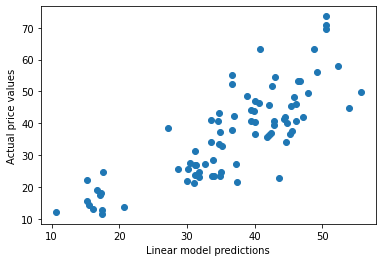

68.93808111751595
73.29389457023285


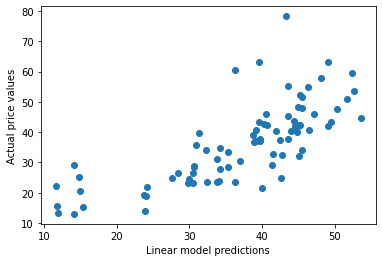

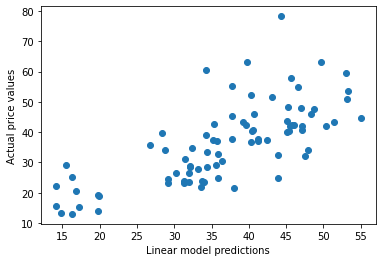

75.50051940760754
82.98583186007758


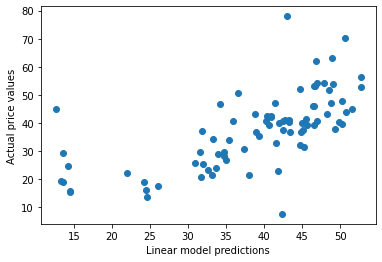

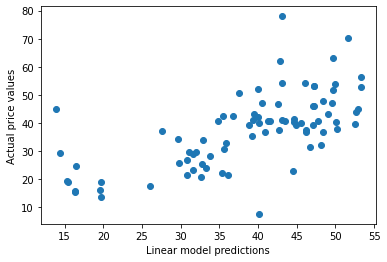

101.34255704602374
103.34206507206193


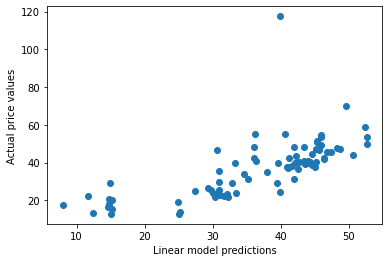

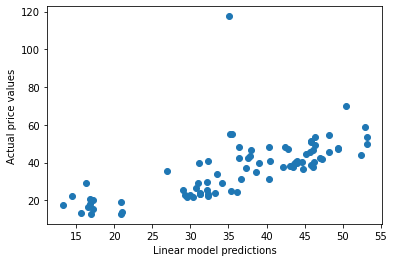

124.63974943997951
131.55390427285033


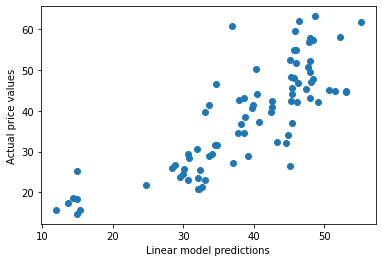

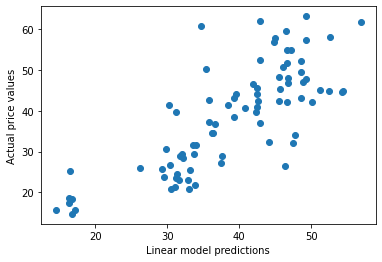

55.751832045784795
63.85517209860369


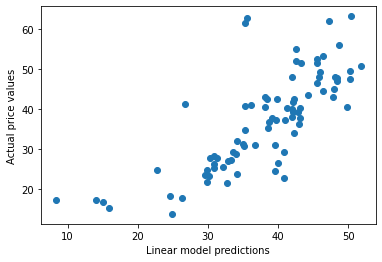

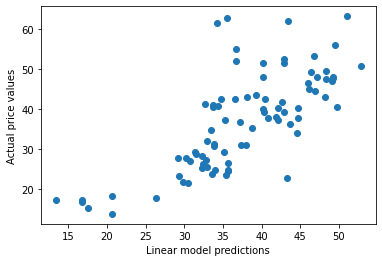

60.91766371701364
67.36363595561343


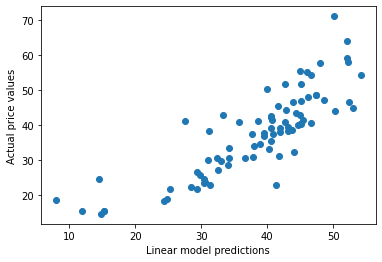

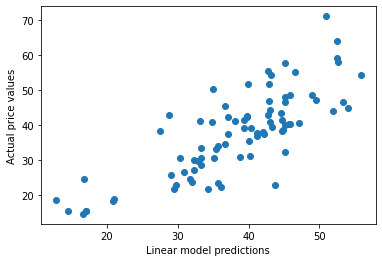

42.454695366091975
53.07928152756876


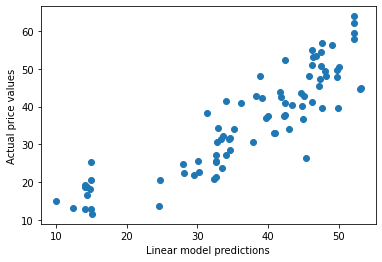

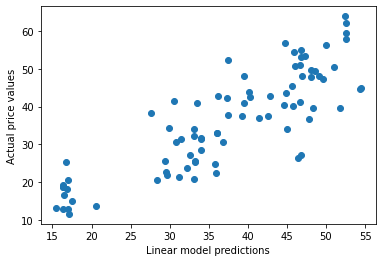

40.4175487834369
51.69337710884808


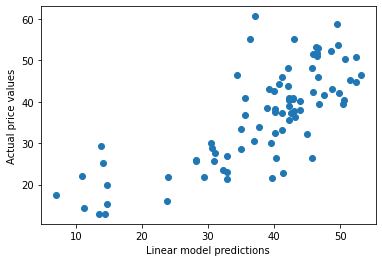

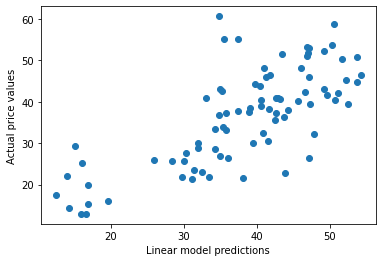

63.69416631676254
68.87722937804294


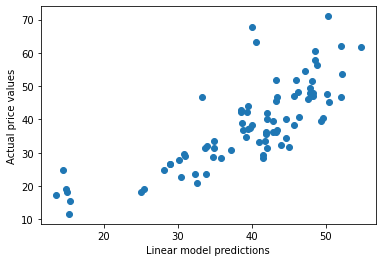

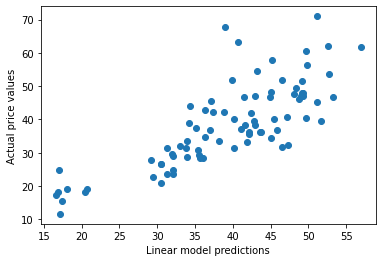

60.28411218317963
59.57046954055242


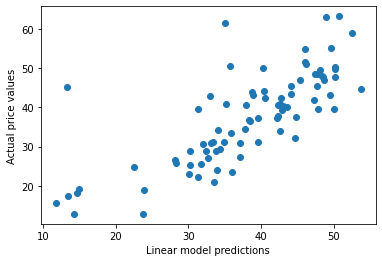

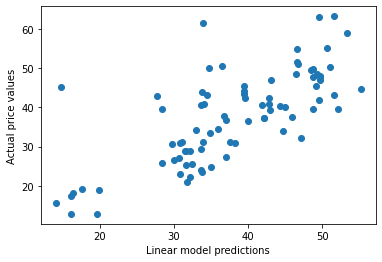

57.40713928094366
64.76617266007771


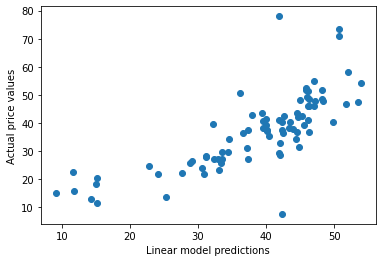

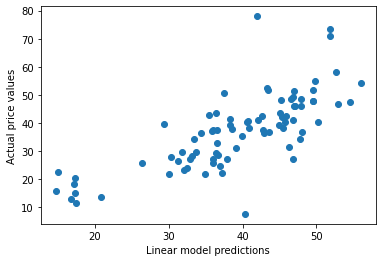

75.39900791517574
82.27110474529981


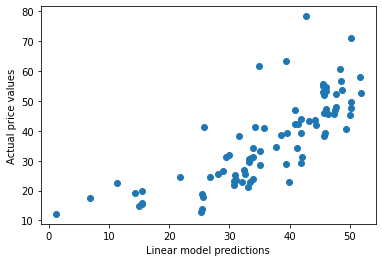

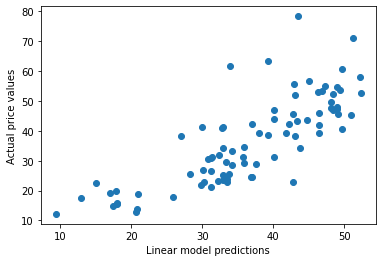

80.94943815698636
78.56649824411075


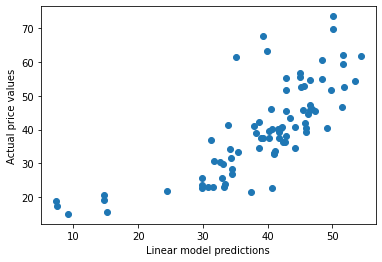

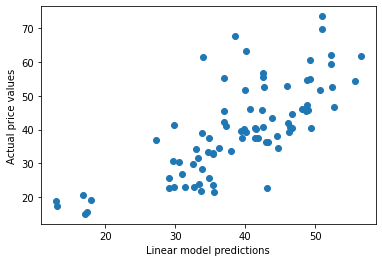

77.04995875535673
82.86209903869488


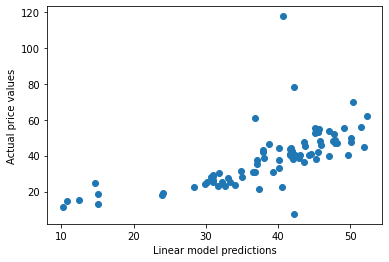

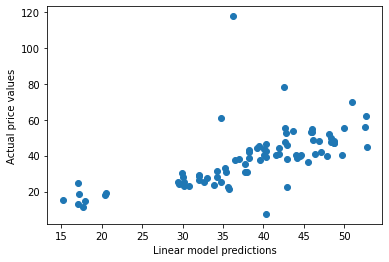

145.16068836638783
155.2653577518265


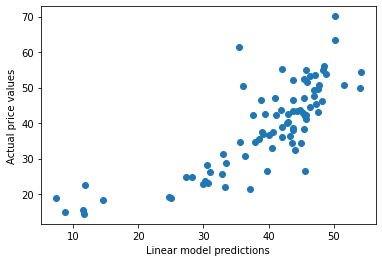

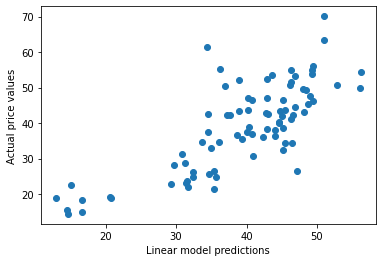

55.74463511210051
60.702202171107835


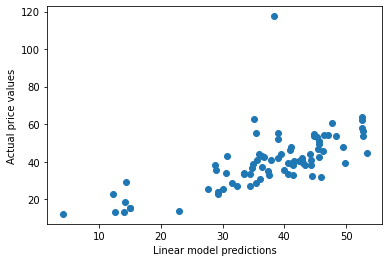

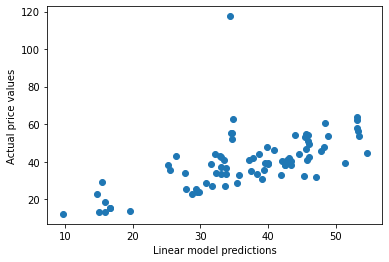

132.54386511788582
150.27466685185414


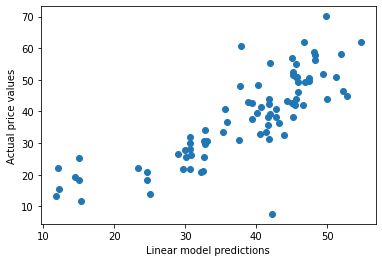

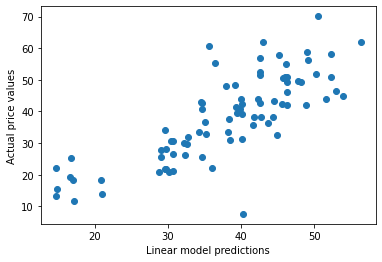

63.86234153712659
70.17644318760716


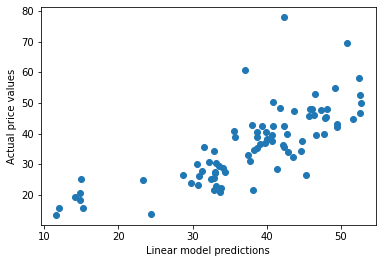

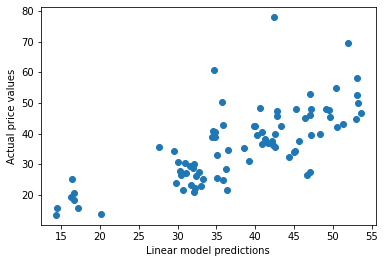

65.85013381211843
74.46054250554381


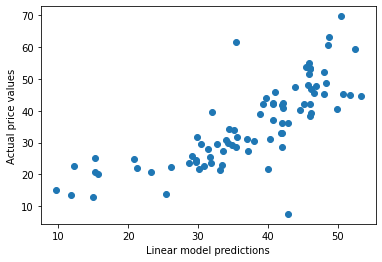

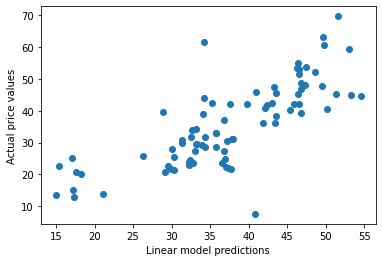

69.9293865691854
71.34883558429563


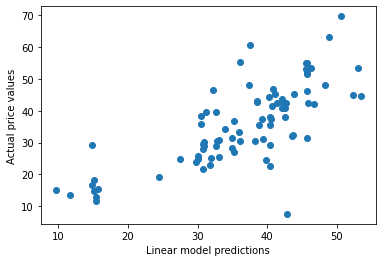

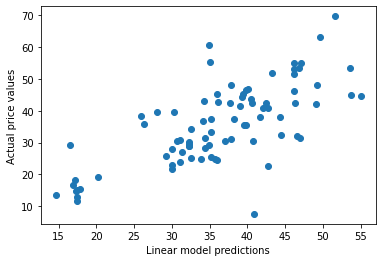

72.95255733558436
79.29783092862613


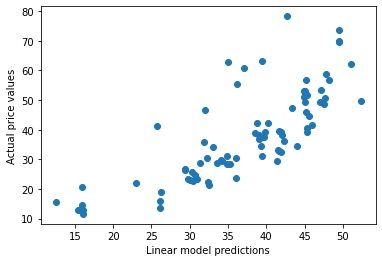

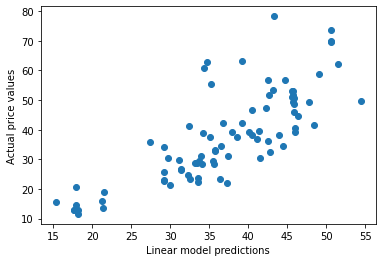

98.83497762464155
99.56131685030378


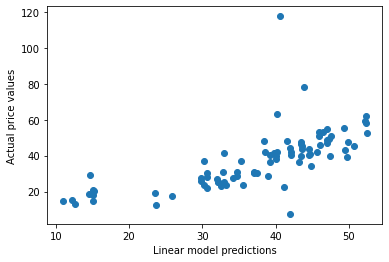

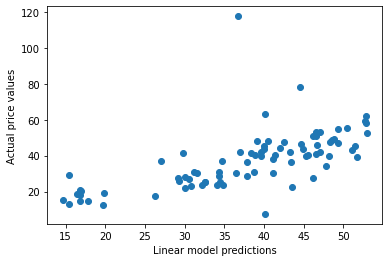

142.72638517996523
155.75745901216183


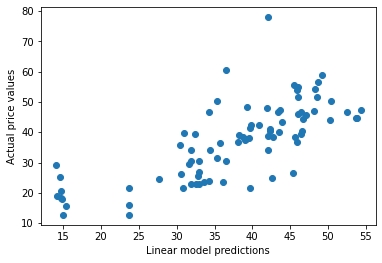

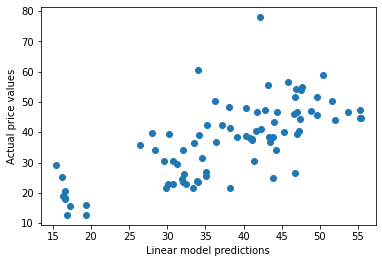

74.54482048119425
80.33190109252632


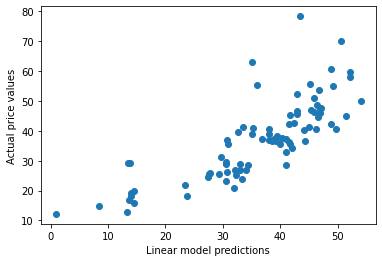

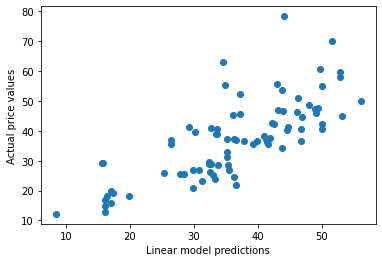

67.15711604717586
75.37650119338758


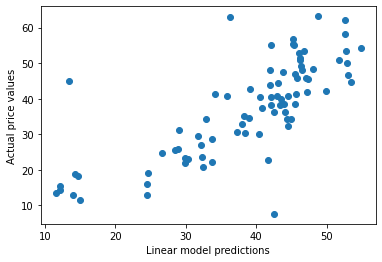

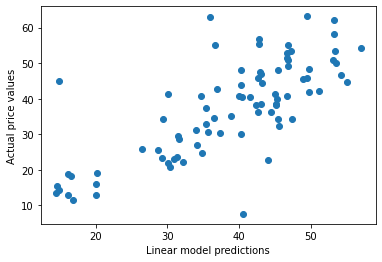

77.6011879338449
81.52494708634306


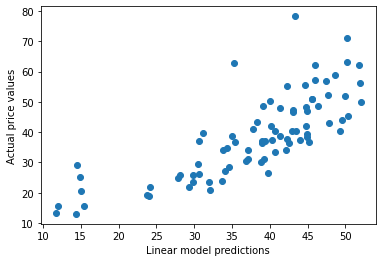

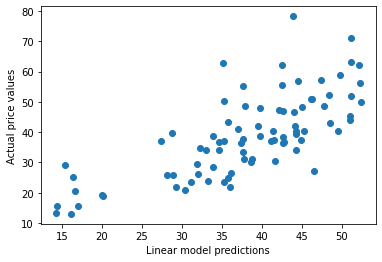

72.83993201515102
86.02619031471393


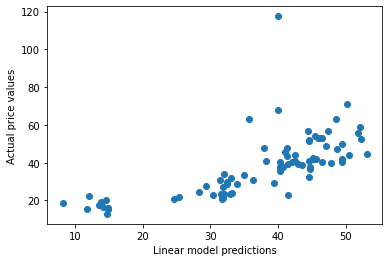

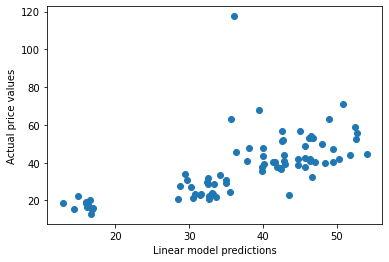

136.84998845580083
150.07106465162795


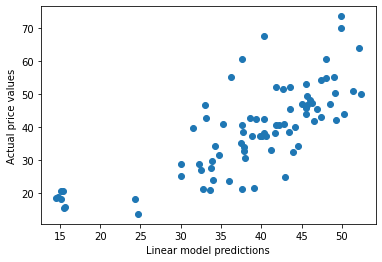

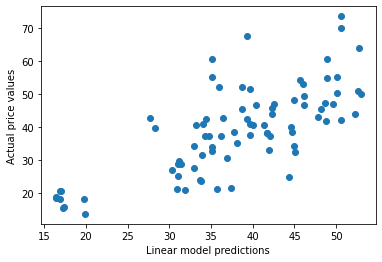

75.59754092097674
80.77880552716167


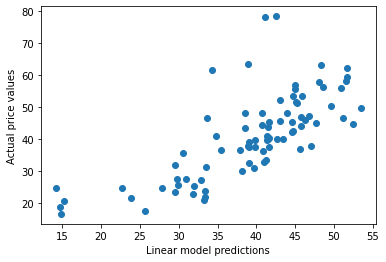

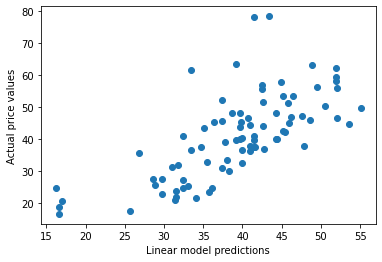

85.59339503050512
92.5868347622131


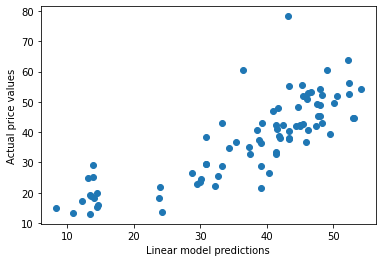

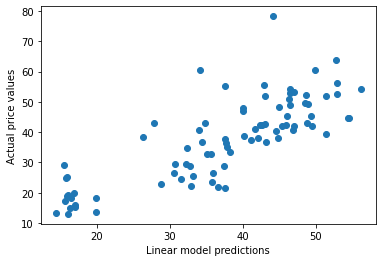

63.39248496067418
68.69752181792518


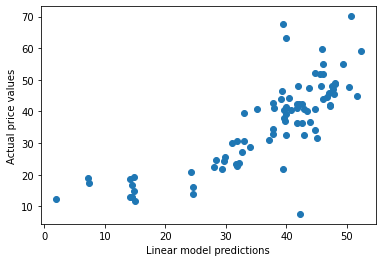

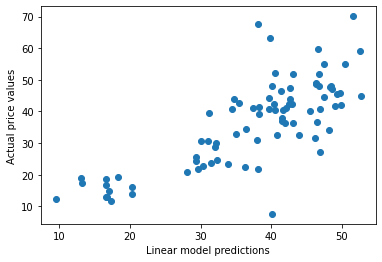

70.07512508582816
77.50864421827717


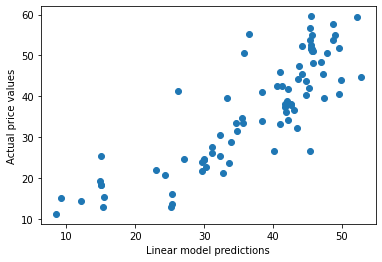

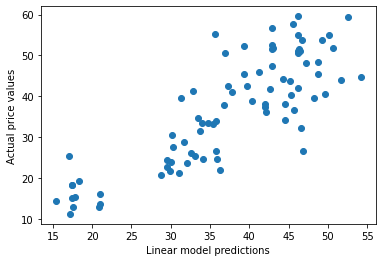

51.558788522978205
56.61145928297095


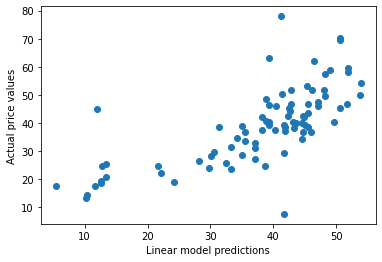

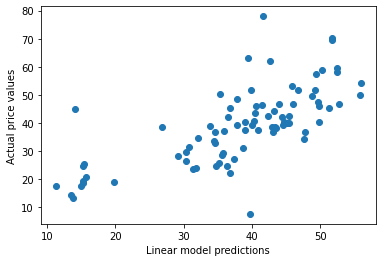

96.65543663616259
97.09723804073235


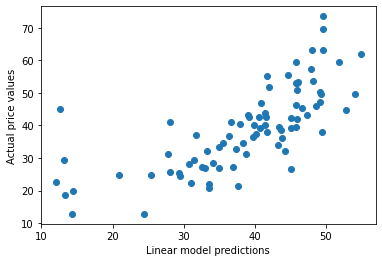

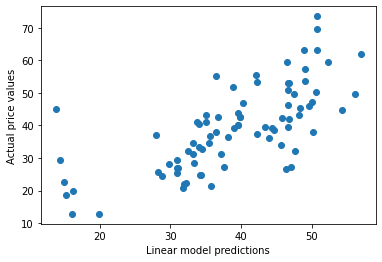

77.60031565783459
84.15035442695574


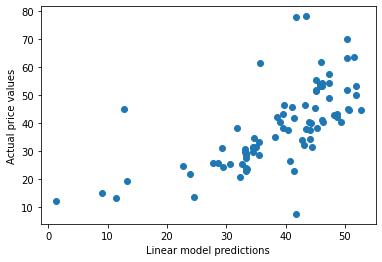

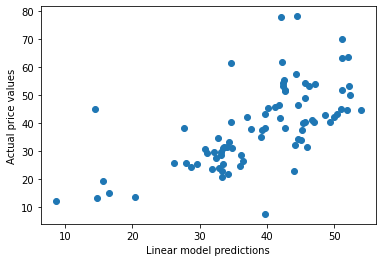

117.09256212341687
122.32744682823673


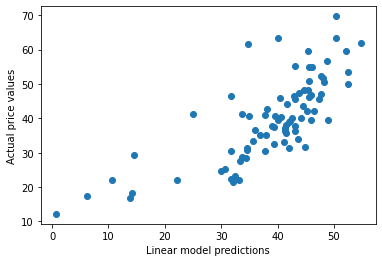

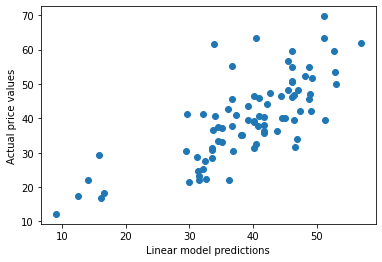

65.17436051751847
63.916629424073456


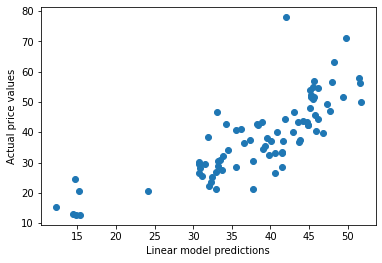

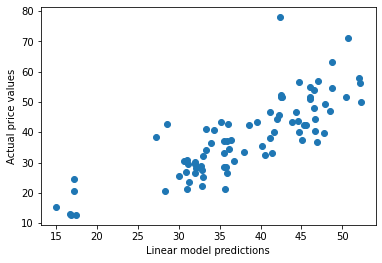

61.056466764036955
59.19200385357607


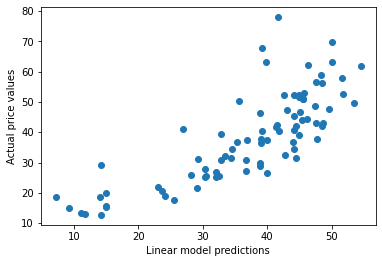

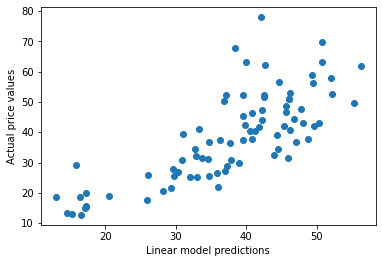

81.2893917756976
86.91721221611779


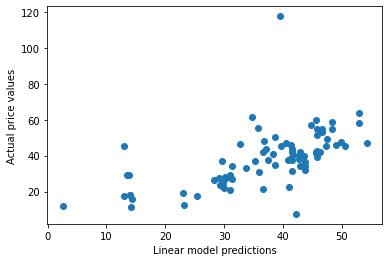

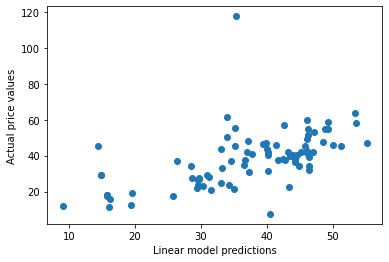

162.90545459147893
173.7575591125416


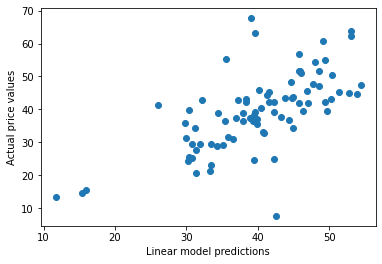

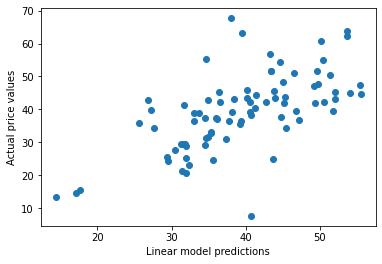

75.87622418846448
81.81026448340198


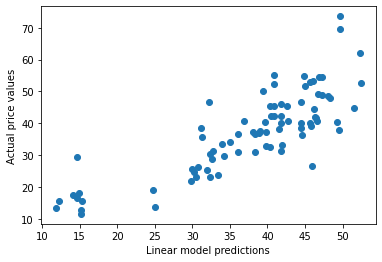

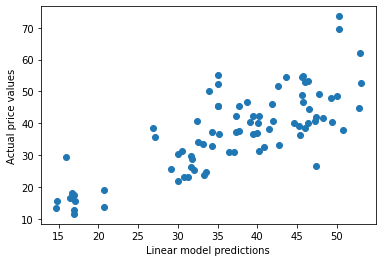

53.856751454552274
64.02711439070094


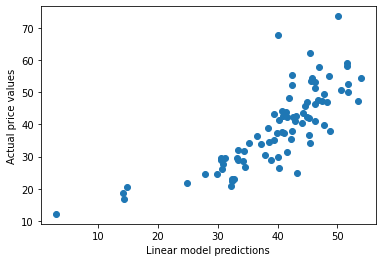

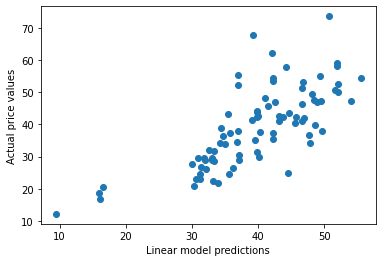

56.47314992451037
66.49357942379835


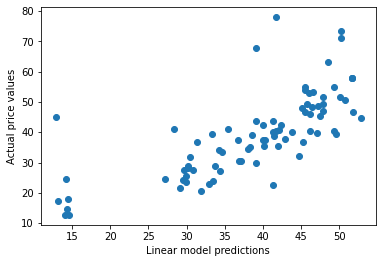

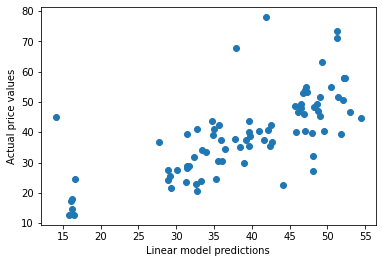

85.07042837161127
91.97365899954993


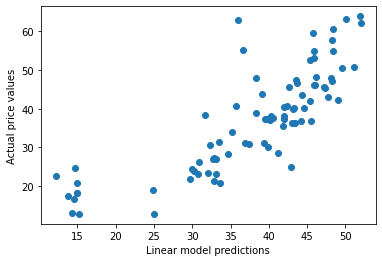

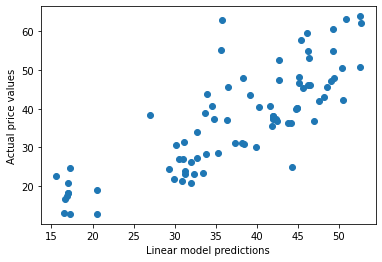

58.677185939661626
59.79328878796343


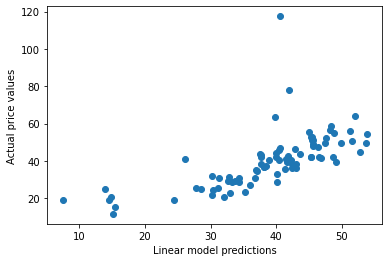

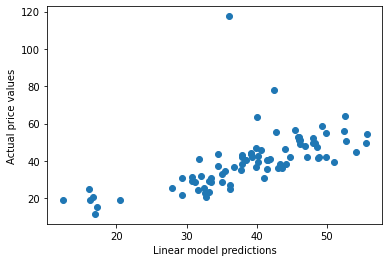

128.15753665355365
136.28725338024728


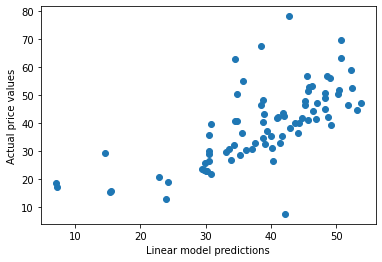

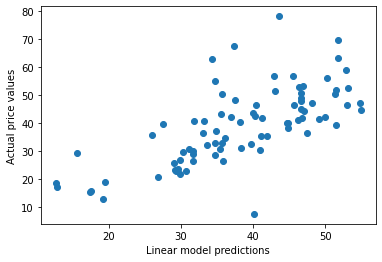

97.78667077666546
98.16772604090274


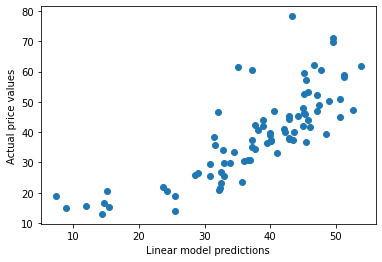

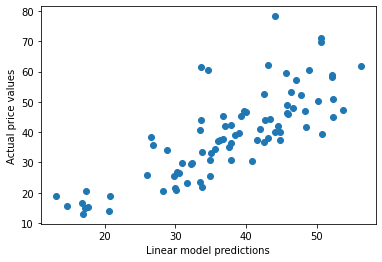

77.01293301219168
79.32113680133489


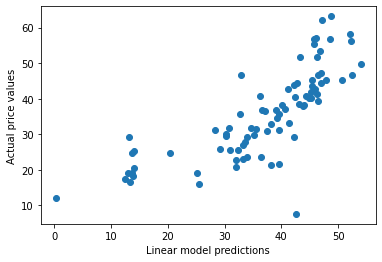

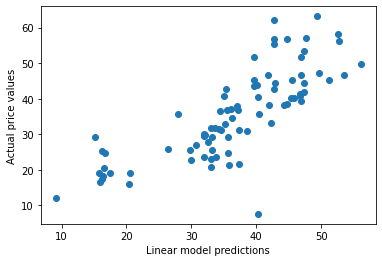

67.95426977639593
60.558607578365944


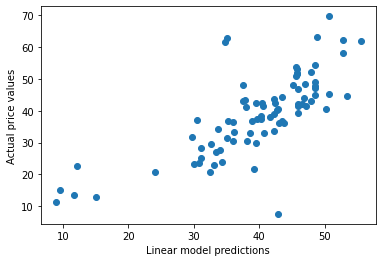

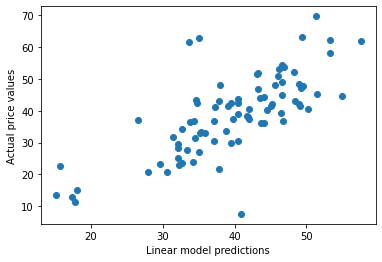

72.08242205697954
74.01946290048967


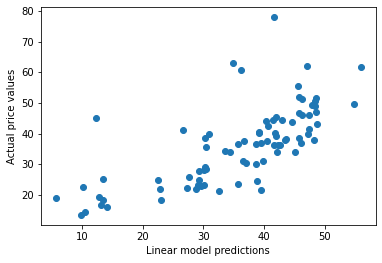

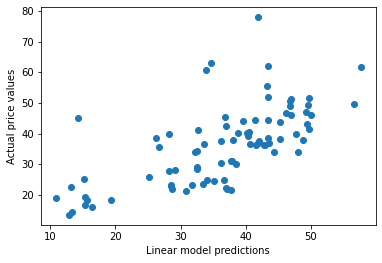

87.9494685216602
94.6850487654878


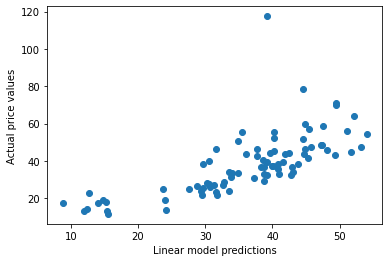

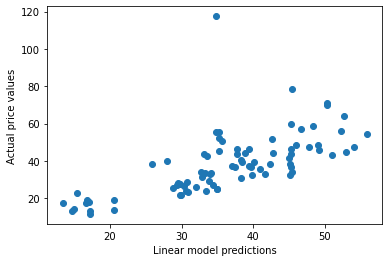

145.11380039886853
159.4625999657461


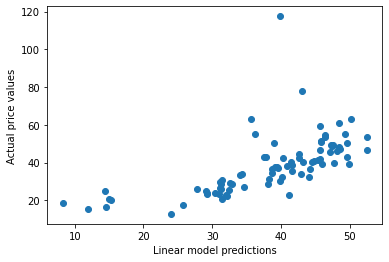

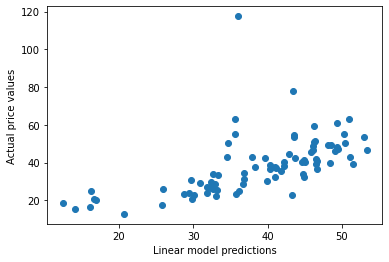

141.98556215167824
155.1393791729195


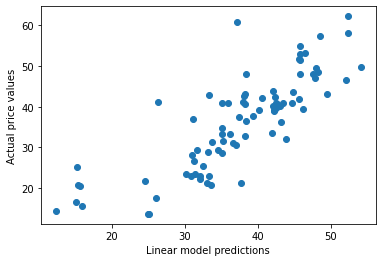

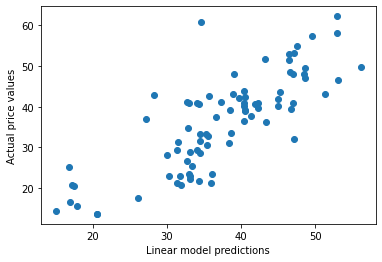

46.69218333366063
50.03798668703439


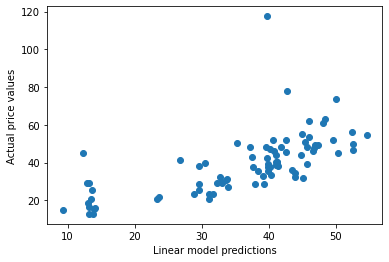

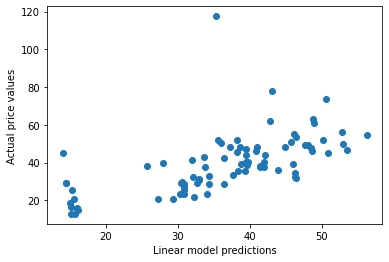

157.80305205567026
169.43989243858135


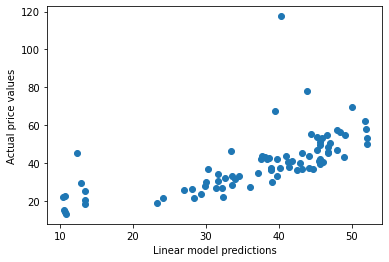

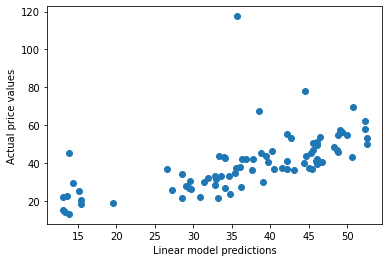

146.82088427039997
156.26171389038913


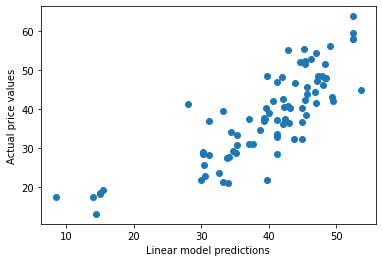

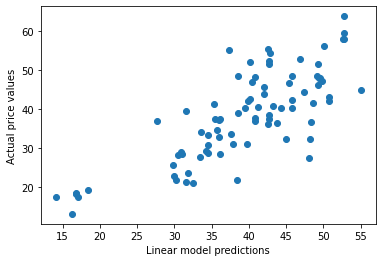

43.297788399287654
51.703018739797756


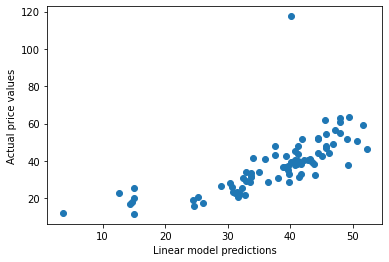

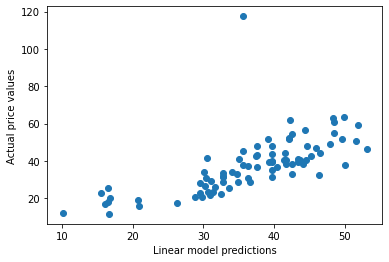

117.41624734143112
128.91246780760736


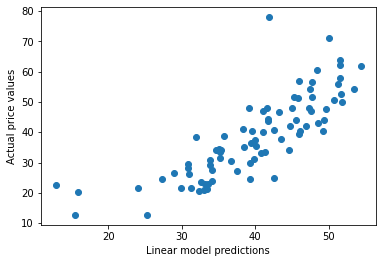

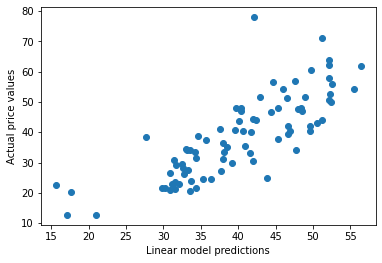

68.1847008611694
70.63194642378053


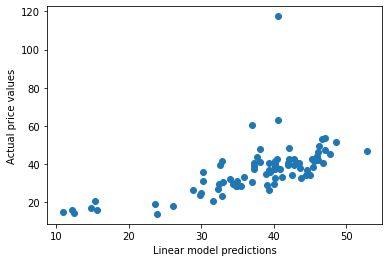

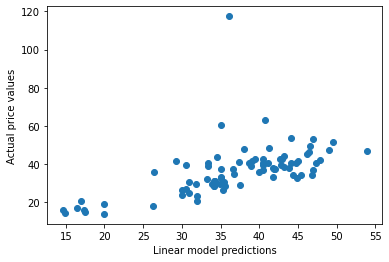

114.93522916310721
126.47462291210843


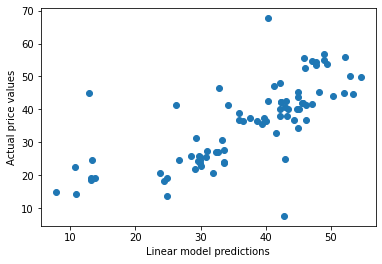

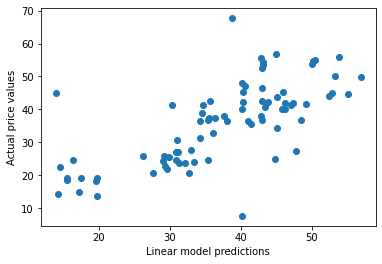

77.13283366048486
80.66657224872779


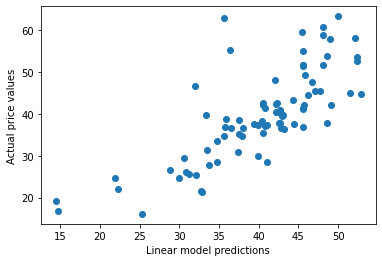

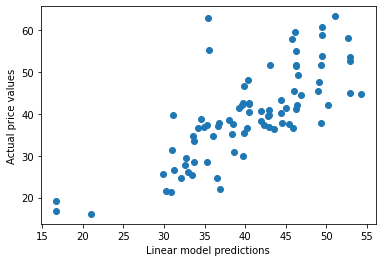

48.426169059113086
50.58780138502665


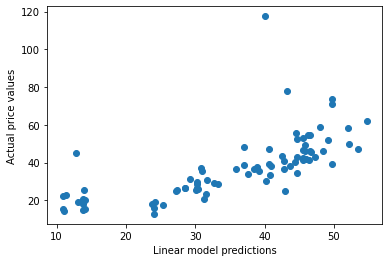

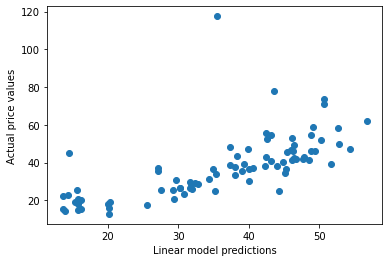

147.37519365698978
154.42710887195074


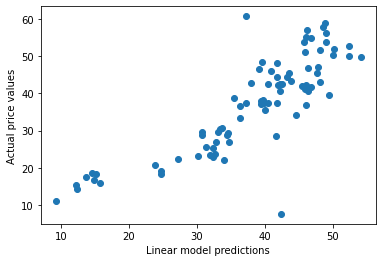

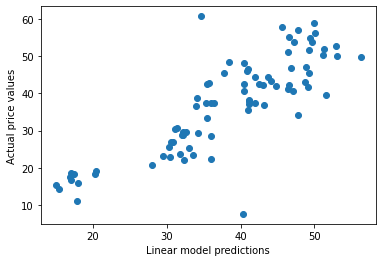

50.75536775249835
52.25017092664364


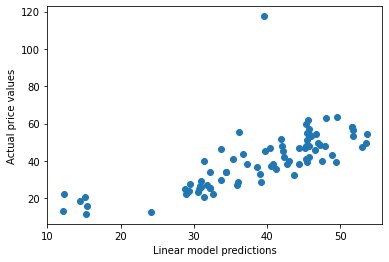

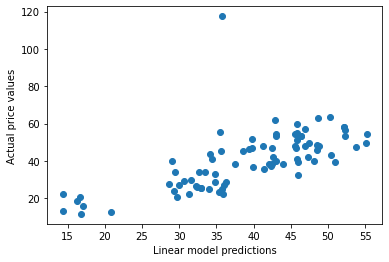

123.88220235362091
138.86467873363492


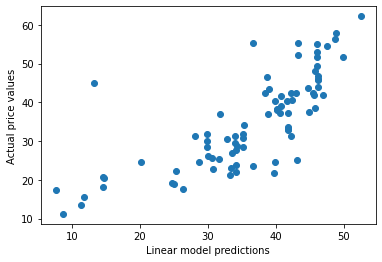

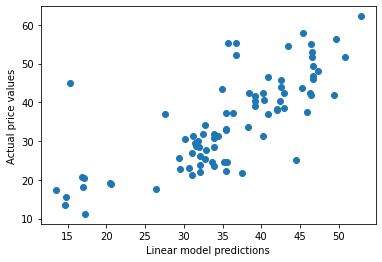

60.89772609352553
59.89891945716204


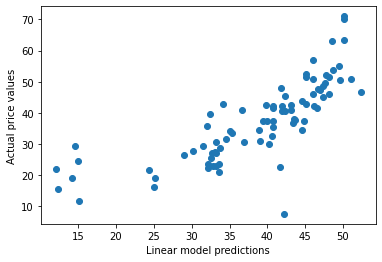

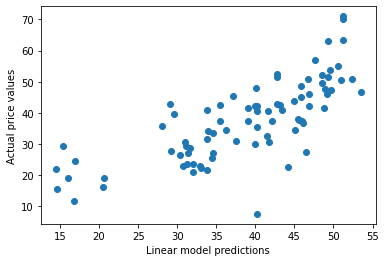

65.9345936566441
73.40262489184533


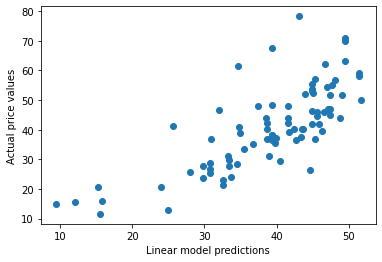

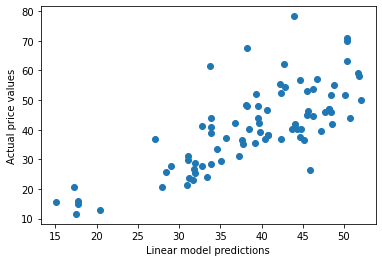

88.18714748260695
90.02983414325035


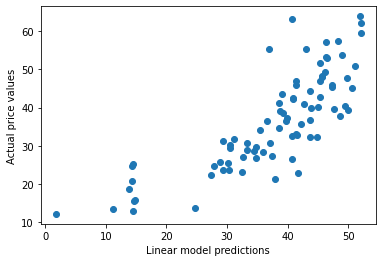

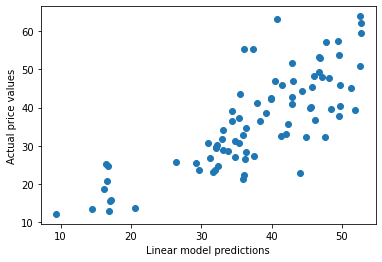

57.94934164549861
60.71610552952526


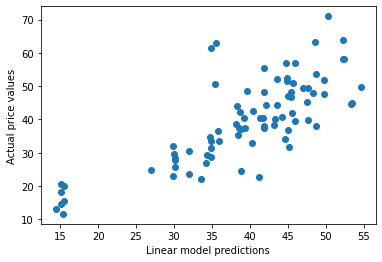

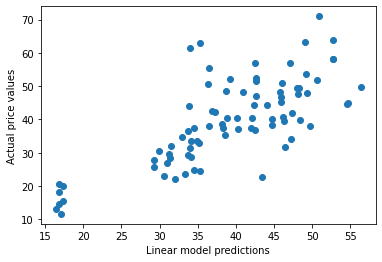

65.04950359690459
73.29025962343687


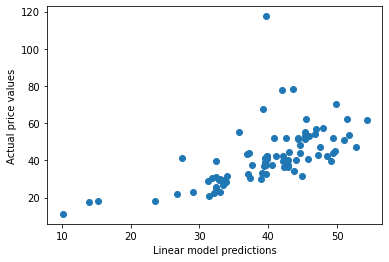

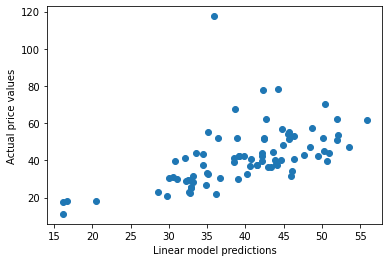

161.15616405507717
176.96443312100573


In [29]:
for x in range(1, 100):
    from sklearn.model_selection import train_test_split

    #Define the input and target variable
    x= house_price.drop(columns= 'house_price_of_unit_area', axis=1)
    y= house_price['house_price_of_unit_area']

    #Splitting the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)
    
    from sklearn.linear_model import LinearRegression
    #Building Linear Model
    lm_md= LinearRegression().fit(x_train, y_train)
    
    #Make predictions on test
    lm_pred= lm_md.predict(x_test)
    lm_pred #How good are these predictions?

    import matplotlib.pyplot as plt
    plt.scatter(lm_pred, y_test)
    plt.xlabel('Linear model predictions')
    plt.ylabel('Actual price values')
    plt.show()
    
    #Computing MSE (Lower the better)
    MSE=np.mean((y_test-lm_pred)**2)
    
    #2nd LR Model
    x_train2= x_train.drop(columns='distance_to_the_nearest_MRT_station')
    lm_md= LinearRegression().fit(x_train2, y_train)
    
    #Make predictions on test
    x_test2=x_test.drop(columns='distance_to_the_nearest_MRT_station')
    lm_pred2= lm_md.predict(x_test2)
    lm_pred2 #How good are these predictions?

    import matplotlib.pyplot as plt
    plt.scatter(lm_pred2, y_test)
    plt.xlabel('Linear model predictions')
    plt.ylabel('Actual price values')
    plt.show()
    
    #Computing MSE (Lower the better)
    MSE2=np.mean((y_test-lm_pred2)**2)
    
    print(MSE)
    print(MSE2)

In [ ]:
#g. Based on my results, Model 1 was better 89% of the time. Therofre, I think 
#because it was the better the first time it ran, and then in the loop, model 1 
#would be the best to proceed with!